In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [42]:
df = pd.read_csv("Featured_Engineering_Data_To_CSV.csv")
df.drop("date", axis=1, inplace=True)
df.set_index("Name", inplace=True)
df.dropna(inplace=True)

df.head()

,open,high,low,close,volume,RSI,Pct_Change,MA20,MA50,MA100,EMA_6,EMA_12,EMA_26,High_to_Close,Low_to_Close
Name,,,,,,,,,,,,,,,
A,43.50,43.890,42.95,43.09,2986405,45.041816,-1.147052,43.6940,43.8710,43.1518,43.062438,43.250076,43.670602,0.800,-0.14
A,42.82,43.460,42.72,43.17,1940832,41.624365,0.185658,43.6260,43.8822,43.1327,43.093170,43.237757,43.633521,0.290,-0.45
A,43.46,44.295,43.40,44.23,2100873,51.360947,2.455409,43.5870,43.9098,43.1290,43.417978,43.390410,43.677704,0.065,-0.83
A,44.38,44.670,44.12,44.36,2572391,49.878049,0.293918,43.5475,43.9424,43.1264,43.687127,43.539577,43.728245,0.310,-0.24
A,44.60,44.960,44.34,44.60,3476214,48.753117,0.541028,43.5410,44.0084,43.1249,43.947948,43.702719,43.792819,0.360,-0.26


In [43]:
all_years = pd.read_csv("all_stocks_5yr.csv")
row_counts = all_years.groupby(all_years.Name).size()
stocks_with_few_rows = row_counts[row_counts < 500].index
stocks_with_few_rows
df = df[~df.index.isin(stocks_with_few_rows)].copy()

In [44]:
df["Label2"] = df.groupby("Name").Pct_Change.shift(-1)
df["Label"] = (df["Label2"] > 0).astype(int)
df.drop(columns=['Label2'], inplace=True)
df.head()

,open,high,low,close,volume,RSI,Pct_Change,MA20,MA50,MA100,EMA_6,EMA_12,EMA_26,High_to_Close,Low_to_Close,Label
Name,,,,,,,,,,,,,,,,
A,43.50,43.890,42.95,43.09,2986405,45.041816,-1.147052,43.6940,43.8710,43.1518,43.062438,43.250076,43.670602,0.800,-0.14,1
A,42.82,43.460,42.72,43.17,1940832,41.624365,0.185658,43.6260,43.8822,43.1327,43.093170,43.237757,43.633521,0.290,-0.45,1
A,43.46,44.295,43.40,44.23,2100873,51.360947,2.455409,43.5870,43.9098,43.1290,43.417978,43.390410,43.677704,0.065,-0.83,1
A,44.38,44.670,44.12,44.36,2572391,49.878049,0.293918,43.5475,43.9424,43.1264,43.687127,43.539577,43.728245,0.310,-0.24,1
A,44.60,44.960,44.34,44.60,3476214,48.753117,0.541028,43.5410,44.0084,43.1249,43.947948,43.702719,43.792819,0.360,-0.26,1


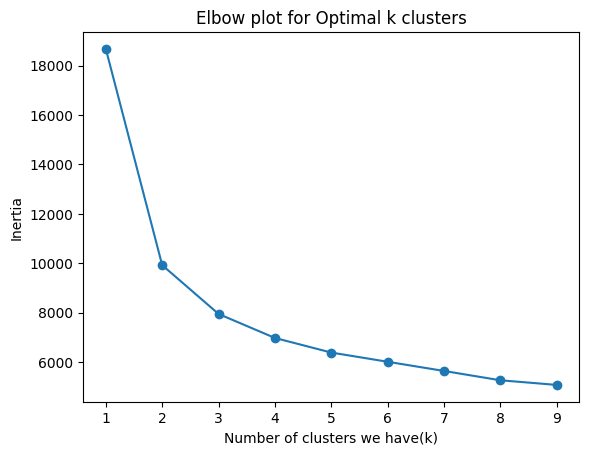

In [45]:

# בחירת הפיטצ'רים כלומר לקחתי את כל המידע שלי מהמניה שבחרתי
dfAAL = df[df.index == "AAL"]
features = dfAAL.drop(columns="Label").copy()

#  מנרמל את התכונות שיהיו באותו סדר גודל בשביל שאף משתנה לא ישתלט לי בצורה חריגה על מציאת האמצע כלומר הקלסטר שלי
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# מציאת מספר הקלאסטרים האופטימלי בעזרת שיטת המרפק
inertia = []
k_range = range(1, 10)
for k in k_range:
    # זריקת הנקודות באופן רנדומלי
    kmeans = KMeans(n_clusters=k, random_state=42)
    # מציאת הנקודות שיהיו במקומות האופטימלים
    kmeans.fit(scaled_features)
    # מכניס לרשימה שלי את האינרציה
    inertia.append(kmeans.inertia_)

# יצירת גרף המרפק שנראה למטה
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters we have(k)')
plt.ylabel('Inertia')
plt.title('Elbow plot for Optimal k clusters')
plt.show()


########################## מספר הקלסטרים האופטימלי שלנו פה זה 2 ##########################

In [46]:
# רשימת שמות המניות שלנו
stocks = df.index.unique().tolist()
# יצירת מילוןa
all_clusters ={}
for stock in stocks:
    # הגדרת המשתנה שירוץ על כל מניה
    stock_df = df[df.index == stock]
   # הגדרת איקס שלנו שזה כל הפיטצ'רים פחות הלייבל
    X = stock_df.drop(columns="Label").copy()
   # הגדרת וואי שלנו שזה הלייבל
    y = stock_df["Label"]
    # חלוקת הנתונים לטריין וטסט
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # כיווץ הנתונים שיהיו בין 0 ל1 בשביל שהמחשב יידע להתמודד עם ההבדלים בסדרי גודל שלנו
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    # הגדרת מספר הקלסטרים האופטימלי שבחרנו כמסקנה מהגרף
    n_clusters = 2
    # הגדרת המודל עם המשתנים שבחרנו
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    # הפעלת המודל שיעבוד בצורה אופטימלית
    kmeans.fit(X_train_scaled)

    # בניית הדאטה פריים שלנו שנראה בהמשך
    cluster_df = pd.DataFrame({'Cluster': kmeans.labels_}, index=X_train.index)
    cluster_df["Label"] = y_train.copy()
    # עבור כל קלסטר הוא מחשב את הממוצע של הלייבל
    cluster_means = cluster_df.groupby('Cluster')['Label'].mean()
    all_clusters[f"{stock}"] = cluster_means


In [47]:
# הצגת הדאטה שלנו
df_clusters = pd.DataFrame(all_clusters)
df_clusters = df_clusters.T

df_clusters.head()

Cluster,0,1
A,0.512963,0.528351
AAL,0.602871,0.504447
AAP,0.529262,0.497512
AAPL,0.540496,0.485934
ABBV,0.549945,0.529412


In [48]:
df_clusters.describe()

Cluster,0,1
count,496.000000,496.000000
mean,0.526387,0.527717
std,0.025200,0.029977
min,0.375000,0.435897
25%,0.510687,0.506750
50%,0.527071,0.524993
75%,0.543014,0.542974
max,0.602871,0.625000


In [49]:
# מציאת המקסימום
max_value = df_clusters.max().max()
max_index = df_clusters.stack().idxmax()  
print(f"Maximum Value: {max_value}")
print(f"Index of Maximum Value: {max_index}")

Maximum Value: 0.625
Index of Maximum Value: ('TROW', 1)


In [50]:
df_clusters[df_clusters.index == "TROW"]

Cluster,0,1
TROW,0.514069,0.625


In [51]:
# מציאת המינימום
min_value = df_clusters.min().min()
min_index = df_clusters.stack().idxmin()  
print(f"Minimum Value: {min_value}")
print(f"Index of Minimum Value: {min_index}")

Minimum Value: 0.375
Index of Minimum Value: ('LLL', 0)


In [52]:
df_clusters[df_clusters.index == "LLL"]


Cluster,0,1
LLL,0.375,0.529352
